In [1]:
#import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils

#testing model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
import seaborn as sns

#testing model 

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns


#import matplotlib.pyplot as plt
#plt.style.use('wordle')
#plt.figure(figsize = (100,100))
#plt.scatter(X[:,0], X[:,1], c=y, marker= '*',s=100,edgecolors='black')
#plt.show()

#import data 
df = pd.read_excel('/Users/nwilson/Desktop/ewu/Comap MCM 2023/final_knn_logreg_file.xlsx')
print(df)

      N1_C   N2_C  N3_C     UN2_F  RL  UL  SS  DRAP
0    361.2  18.75  2.33   9094.32   1   1  12     0
1    189.8  16.25  3.33  16015.61   0   0   8     1
2    295.0  25.25  5.67  29608.46   0   0   6     0
3    296.6  14.75  3.33   7971.48   1   0   8     0
4    283.4  27.00  5.00  39565.78   1   0   9     0
..     ...    ...   ...       ...  ..  ..  ..   ...
354  431.4  41.25  9.33  22280.65   0   1  11     1
355  245.0  35.25  4.67  13599.06   0   1   9     0
356  309.0  15.50  2.33  10235.27   0   0   9     1
357  313.4  36.50  6.33  48539.37   0   0  11     0
358  319.0  32.00  7.00  19328.99   0   1  17     1

[359 rows x 8 columns]


In [2]:
df.shape

(359, 8)

In [3]:
df.head()

,N1_C,N2_C,N3_C,UN2_F,RL,UL,SS,DRAP
0,361.2,18.75,2.33,9094.32,1,1,12,0
1,189.8,16.25,3.33,16015.61,0,0,8,1
2,295.0,25.25,5.67,29608.46,0,0,6,0
3,296.6,14.75,3.33,7971.48,1,0,8,0
4,283.4,27.00,5.00,39565.78,1,0,9,0


In [4]:
#correlation coefficient of data frame 
correlation = df.corr()

In [5]:
#pearson correlation coefficients 
correlation['DRAP'].sort_values(ascending=False)

DRAP     1.000000
UL       0.182701
SS       0.134985
RL       0.111249
N1_C     0.088272
N2_C     0.027191
N3_C    -0.007301
UN2_F   -0.110544
Name: DRAP, dtype: float64

In [6]:
#split independent and dependent variables 
X=df.drop(['DRAP'], axis=1)
y=df['DRAP']

In [7]:
#split indepdent variables 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
      random_state=0)

In [8]:
X_train.shape, X_test.shape

((287, 7), (72, 7))

In [9]:
#check data types
X_train.dtypes

N1_C     float64
N2_C     float64
N3_C     float64
UN2_F    float64
RL         int64
UL         int64
SS         int64
dtype: object

In [10]:
cols=X_train.columns

In [11]:
#scale values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [12]:
#split training values
X_train = pd.DataFrame(X_train, columns=[cols])

In [13]:
#split test values
X_test = pd.DataFrame(X_test, columns=[cols])

In [14]:
#scaled training values 
print(X_train)

         N1_C      N2_C      N3_C     UN2_F        RL        UL        SS
0    0.069380  0.285059  1.255086 -0.437331 -0.632456 -0.847681 -0.395746
1   -0.666905 -0.317782  0.011547  2.165139 -0.632456 -0.847681 -0.395746
2    0.300713 -0.524018 -0.921107 -0.317046 -0.632456  1.179689 -0.043016
3   -0.226627 -0.175004  0.219840 -0.449532  1.581139 -0.847681 -0.748476
4   -0.890776 -1.095130 -1.334584 -0.641074 -0.632456  1.179689  1.015174
..        ...       ...       ...       ...       ...       ...       ...
282  0.546970  0.919629  1.255086 -0.257133 -0.632456 -0.847681 -0.748476
283  0.696217  0.221602  0.114139  0.028936 -0.632456 -0.847681 -0.748476
284  0.288276 -0.888895  0.219840 -1.239515  1.581139  1.179689  1.367904
285 -0.258963 -0.904760 -0.091045 -1.320480  1.581139  1.179689  1.015174
286  0.507171  0.364380  0.114139  0.692585  1.581139 -0.847681 -0.395746

[287 rows x 7 columns]


In [15]:
#scaled test values 
print(X_test)

        N1_C      N2_C      N3_C     UN2_F        RL        UL        SS
0   1.096697  0.031231 -0.507630  0.513107 -0.632456 -0.847681 -1.453936
1   0.621594  0.776851  1.463379  0.470040  1.581139 -0.847681 -0.395746
2   0.477322  0.935493  0.322432  0.357912 -0.632456  1.179689 -0.395746
3   0.295738  1.506606  0.530725 -0.195733 -0.632456 -0.847681  1.015174
4  -0.306225  1.585927  1.152494  0.495351 -0.632456  1.179689  0.309714
..       ...       ...       ...       ...       ...       ...       ...
67  0.750941 -0.286054 -0.507630 -0.404165  1.581139  1.179689 -0.748476
68  0.263401  0.380244  1.463379  0.526360 -0.632456  1.179689 -0.395746
69  0.059430  0.380244  0.633317 -0.126255 -0.632456 -0.847681 -0.748476
70 -0.836052  0.189873  0.425024 -0.902125 -0.632456  1.179689  1.720634
71 -1.097234 -0.492289 -0.610222 -0.480209 -0.632456  1.179689 -0.043016

[72 rows x 7 columns]


In [16]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=19, metric='manhattan')

In [17]:
# fit the model to the training set
knn.fit(X_train, y_train)

/Users/nwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KNeighborsClassifier(metric='manhattan', n_neighbors=19)

In [18]:
# predict based off test set
y_pred = knn.predict(X_test)

y_pred

/Users/nwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [19]:
y_test.value_counts()

0    61
1    11
Name: DRAP, dtype: int64

In [20]:
#confusion matrix, with accuracy results 
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print('Accuracy:',result2)

Confusion Matrix:
[[61  0]
 [11  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        61
           1       0.00      0.00      0.00        11

    accuracy                           0.85        72
   macro avg       0.42      0.50      0.46        72
weighted avg       0.72      0.85      0.78        72

Accuracy: 0.8472222222222222


/Users/nwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 257.44, 'Predicted label')

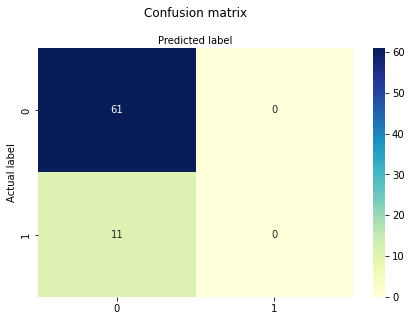

In [21]:
#heatmap of confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [22]:
#setting prediction values for independet variables    
Xnew =[[-1.120366,-0.508924,-0.625952,
      -0.48626,-0.647085,1.174804,-0.025032]]
print(Xnew)

[[-1.120366, -0.508924, -0.625952, -0.48626, -0.647085, 1.174804, -0.025032]]


In [23]:
#predicting dependent variable 
predicted=knn.predict(Xnew)
print(predicted)

[0]
